In [92]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [3]:
capsella160 = "aatgtttagaagtgagaagaaagacttgtggatatttggtcccaaatgggataagaacccaaaaccattgntttgcggcagtgaatggcttgtataaagttatttnggtttanaatatattataatanaatgaacttgattgattacttantgctcgacatg"

In [4]:
capsella175 = "tggcttgtataaagttattttgggttagaatatgttataatacaatgaattctgcattgattacaagtgctagagatgcatgaagaatgtttagaagtgagaagaaagagttgttgatatttggttnccaaatgggataagaacccaaaaccnttcctttgangcagtgaatggc"

In [1]:
human = "gatctgaaaagggaaattcagagccattgagtattatggtgaaaaaggaaatatcttcacataaaaaaaattctgaagaactgctttaagatgtgtgtcttcattagacagagttaaactttcttttgattgagaagtttgggaacactgtttgtgtagaacttcaaagggatattt"
#177bp long

In [101]:
#lyratas
edall_accessions = ["MN47Hifi_scafNT1.fasta.csv"]#"SiberianAly_8chr.fasta.csv"] #
#AlCEN178 an AlCEN168

lengths = [[175,180],[165,170]]

edallf = []

for i in edall_accessions: 
    #load in repeats for accession
    path = r"C:\Users\Christie and Victori\Documents\christie\work uni\part II\project\cleaning_sequences\drive-download-20211014T102922Z-001\ed25.11.21.all.repeats.from."+i
    accession_df = pd.read_csv(path)
    
    filelist = accession_df["fasta.file.name"].tolist()
    newfile = []
    for f in filelist:
        new = f.replace(".fasta","")
        newfile.append(new)
    accession_df["fasta.file.name"] = newfile

    chromlist = accession_df["chromosome"].tolist()
    newchrom = []
    replace = ["Aarenosa_", "scaffold", "RaGOO", "CM032905", "_RagTag", "_", "Asue"]
    for k in chromlist:
        elem = k.replace("chr","Chr")
        for r in replace:
            elem1 = elem.replace(r, "")
            elem = elem1
        if len(elem) < 3:
            elem = "Chr" + elem
        newchrom.append(elem)
    accession_df["chromosome"] = newchrom

    accession_df["names"] = accession_df["fasta.file.name"].str.cat(accession_df["chromosome"].astype("str"), sep ="_") 
    accession_df["names"] = accession_df["names"].str.cat(accession_df["start"].astype("str"), sep ="_") 
    accession_df["names"] = accession_df["names"].str.cat(accession_df["width"].astype("str"), sep ="_") 
    # concatenate strings in fasta.name and start column to make names file; make sure variables are strings
    
    wanted = []
    for x in lengths:
        #subsetting repeats into cen180 and cen160
        cen180 = accession_df[accession_df["width"].between(x[0], x[1])]

        # # stratified sampling of repeats

        freqrep = cen180["chromosome"].value_counts()
        freqdf = pd.DataFrame(freqrep)
        length = cen180["chromosome"].count()
        total = 450
        freqdf["freq want"] = (total*freqrep.div(length)).astype(int)

        for x in range(len(freqdf)):
            y = cen180.get(cen180["chromosome"]== freqdf.index[x]).sample(n = freqdf.iloc[x,1])
            wanted.append(y)

    edcat180 = pd.concat(wanted)
    edallf = edallf + wanted #list of all rows in accessions

edall_df = pd.concat(edallf) #whole df!
lyratas = edall_df

In [97]:
#thalianas - cen180 and cen160
# edall_accessions = ["Tanz-1.patch.scaffold.Chr.fa.csv", "22005.patch.scaffold.Chr.fa.csv", #african
#                     "at6137.scaffolds.bionano.final.fasta.csv","at9578.scaffolds.bionano.final.fasta.csv", #eurasian
#                     "Alo-19.ragtag_scaffolds.fa.csv", "Cas-6.ragtag_scaffolds.fa.csv"] #relict
#"all.repeats.from.at6137.scaffolds.bionano.final.fasta.csv"

# edall_accessions = ["at6137.scaffolds.bionano.final.fasta.csv", "at9336.scaffolds.bionano.final.fasta.csv",
#                    "at9578.scaffolds.bionano.final.fasta.csv","at9830.scaffolds.bionano.final.fasta.csv",
#                     "at9503.scaffolds.bionano.final.fasta.csv"]

edall_accessions = ["t2t-col.20210610.fasta.csv"]

#AtCEN160 and AtCEN178
lengths = [[175,180]]#[155,160],

edallf = []

for i in edall_accessions: 
    #load in repeats for accession
    path = r"C:\Users\Christie and Victori\Documents\christie\work uni\part II\project\cleaning_sequences\drive-download-20211014T102922Z-001\ed25.11.21.all.repeats.from."+i
    accession_df = pd.read_csv(path)
    
    filelist = accession_df["fasta.file.name"].tolist()
    newfile = []
    for f in filelist:
        new = f.replace(".fasta","")
        newfile.append(new)
    accession_df["fasta.file.name"] = newfile

    chromlist = accession_df["chromosome"].tolist()
    newchrom = []
    replace = ["Aarenosa_", "scaffold", "RaGOO", "CM032905", "_RagTag", "_", "Asue"]
    for k in chromlist:
        elem = k.replace("chr","Chr")
        for r in replace:
            elem1 = elem.replace(r, "")
            elem = elem1
        if len(elem) < 3:
            elem = "Chr" + elem
        newchrom.append(elem)
    accession_df["chromosome"] = newchrom

    accession_df["names"] = accession_df["fasta.file.name"].str.cat(accession_df["chromosome"].astype("str"), sep ="_") 
    accession_df["names"] = accession_df["names"].str.cat(accession_df["start"].astype("str"), sep ="_") 
    accession_df["names"] = accession_df["names"].str.cat(accession_df["width"].astype("str"), sep ="_") 
    # concatenate strings in fasta.name and start column to make names file; make sure variables are strings
    
    wanted = []
    for x in lengths:
        #subsetting repeats into cen180 and cen160
        cen180 = accession_df[accession_df["width"].between(x[0], x[1])]

        # # stratified sampling of repeats

        freqrep = cen180["chromosome"].value_counts()
        freqdf = pd.DataFrame(freqrep)
        length = cen180["chromosome"].count()
        total = 30 #800
        freqdf["freq want"] = (total*freqrep.div(length)).astype(int)
        
        chromosomes = ["Chr1"]#"Chr2","Chr3","Chr4","Chr5"]
        for x in range(len(freqdf)):
            y = cen180.get(cen180["chromosome"]== freqdf.index[x]).sample(n = freqdf.iloc[x,1]) #
            wanted.append(y)

    edcat180 = pd.concat(wanted)
    edallf = edallf + wanted #list of all rows in accessions

edall_df = pd.concat(edallf) #whole df!
thalianas = edall_df

In [105]:
print(','.join(thalianas["names"].tolist()))

t2t-col.20210610_Chr4_4360653_178,t2t-col.20210610_Chr4_4966696_178,t2t-col.20210610_Chr4_6014420_178,t2t-col.20210610_Chr4_5271059_178,t2t-col.20210610_Chr4_5272896_178,t2t-col.20210610_Chr4_6098783_178,t2t-col.20210610_Chr4_6220081_178,t2t-col.20210610_Chr1_15290153_178,t2t-col.20210610_Chr1_16951147_178,t2t-col.20210610_Chr1_16862677_177,t2t-col.20210610_Chr1_15952746_177,t2t-col.20210610_Chr1_15050386_178,t2t-col.20210610_Chr2_5875903_178,t2t-col.20210610_Chr2_4264095_178,t2t-col.20210610_Chr2_5752969_177,t2t-col.20210610_Chr2_4611845_178,t2t-col.20210610_Chr2_4969851_178,t2t-col.20210610_Chr5_12105930_176,t2t-col.20210610_Chr5_13549857_177,t2t-col.20210610_Chr5_13796320_178,t2t-col.20210610_Chr5_13331873_178,t2t-col.20210610_Chr5_13675598_178,t2t-col.20210610_Chr3_15403165_178,t2t-col.20210610_Chr3_13844994_179,t2t-col.20210610_Chr3_14478837_178,t2t-col.20210610_Chr3_15049075_178,t2t-col.20210610_Chr3_14472256_178


In [102]:
merge = [thalianas, lyratas]
edsampled = pd.concat(merge)
edsampled.rename(columns={"width":"length","seq":"sequence","chromosome":"fasta.name"}, inplace = True)
edsampled["region.start"] = edsampled["start"]
edsampled["region.end"] = edsampled["end"]
edsampled = edsampled[["fasta.name","start","end","length","sequence","strand","region.start","region.end","names"]]

#sampled=edsampled
sampled = edsampled.drop_duplicates(subset = ["sequence"])
sampled

,fasta.name,start,end,length,sequence,strand,region.start,region.end,names
50427,Chr4,4360653,4360830.0,178,AGTATAAGAAATTAAACCGCAACCTGATCTTAAAAGCCTAAGTAGA...,-,4360653,4360830.0,t2t-col.20210610_Chr4_4360653_178
53783,Chr4,4966696,4966873.0,178,AGTATAAGAACTTAAACCGCATCCTGATCTTATAAGCCTAAGTAGT...,-,4966696,4966873.0,t2t-col.20210610_Chr4_4966696_178
59535,Chr4,6014420,6014597.0,178,AATATAAGAACTTAAACCGCAACCTTATCCTAAAAGCCTAAGTAGT...,-,6014420,6014597.0,t2t-col.20210610_Chr4_6014420_178
55494,Chr4,5271059,5271236.0,178,AGTATAAGAACTTAAACCGCAACCCGATCATAAAAGCCTAAGTAGT...,-,5271059,5271236.0,t2t-col.20210610_Chr4_5271059_178
55504,Chr4,5272896,5273073.0,178,AGTATAAGAACTTAAACCGCATCCCGATCTTATAAGCCTAAGTAGT...,-,5272896,5273073.0,t2t-col.20210610_Chr4_5272896_178
...,...,...,...,...,...,...,...,...,...
88542,Chr6,15501079,15501246.0,168,AGTATAAGAAATATAAATGCAACCCGGATCCTGGCTGCTAAAGTAG...,-,15501079,15501246.0,MN47Hifi_scafNT1_Chr6_15501079_168
87949,Chr6,15392693,15392862.0,170,TGAGTATAAGAAAGTAAAATGCAACCCGGATCCTGGCAGCTAAAGT...,-,15392693,15392862.0,MN47Hifi_scafNT1_Chr6_15392693_170
96684,Chr6,17061838,17062005.0,168,AGTATATGAAAGAGAAATGCAACCCGGATCCTGGCTGCTAAAGTAG...,-,17061838,17062005.0,MN47Hifi_scafNT1_Chr6_17061838_168
94750,Chr6,16705166,16705333.0,168,AGTATAAGAAAGTGAAATGCAACCCGGATCCTGGCTGCTAAAGTAG...,-,16705166,16705333.0,MN47Hifi_scafNT1_Chr6_16705166_168


In [103]:
#make uniq sampled fasta

uniq_fasta = open(r"mn47_new.Fasta","w+") #open fasta file, "w+" means you intend to write in it

empty_uniq_fasta = [] #empty list to compile all rows

# capsellas = [[human,"human"],[capsella160,"capsella160"], [capsella175,"capsella175"]]
# for k in capsellas:
#     string_uniq = k[0]
#     n=60
#     split_uniq = [string_uniq[i:i+n] for i in range(0, len(string_uniq), n)] #splits sequence string into length 60
#     join_uniq = "\n".join(split_uniq) #joins string with new lines
#     write_fasta_uniq = ">"+k[1]+"\n"+join_uniq #create fasta format
#     empty_uniq_fasta.append(write_fasta_uniq) #append row's fasta to list

for j in range(len(sampled)): #do for all rows
    string_uniq =sampled.iloc[j,4]
    n=60
    split_uniq = [string_uniq[i:i+n] for i in range(0, len(string_uniq), n)] #splits sequence string into length 60
    join_uniq = "\n".join(split_uniq) #joins string with new lines
    write_fasta_uniq = ">"+sampled.iloc[j,8]+"\n"+join_uniq #create fasta format
    empty_uniq_fasta.append(write_fasta_uniq) #append row's fasta to list

joined_fasta_uniq = "\n".join(empty_uniq_fasta) #join strings in list into one big string with new line breaks
uniq_fasta.write(joined_fasta_uniq) #enter list into fasta file
uniq_fasta.close() #close fasta file 

In [75]:
path = r"C:\Users\Christie and Victori\Documents\christie\work uni\part II\project\cleaning_sequences\clustal\cen1_clustal.txt"

df = pd.read_csv(path, header=None)

lis = []
names = []
for x in range(len(df)):
    y = df.iloc[x,0]
    gr = y.split()
    elem = gr.pop(0)
    elem2 = gr.pop(0)
    lis.append(gr)
    names.append(elem2)

newlis = list(np.float_(lis))
df2 = pd.DataFrame(newlis)
df2["Sequence"] = names
df2 = df2.set_index("Sequence")
#df2

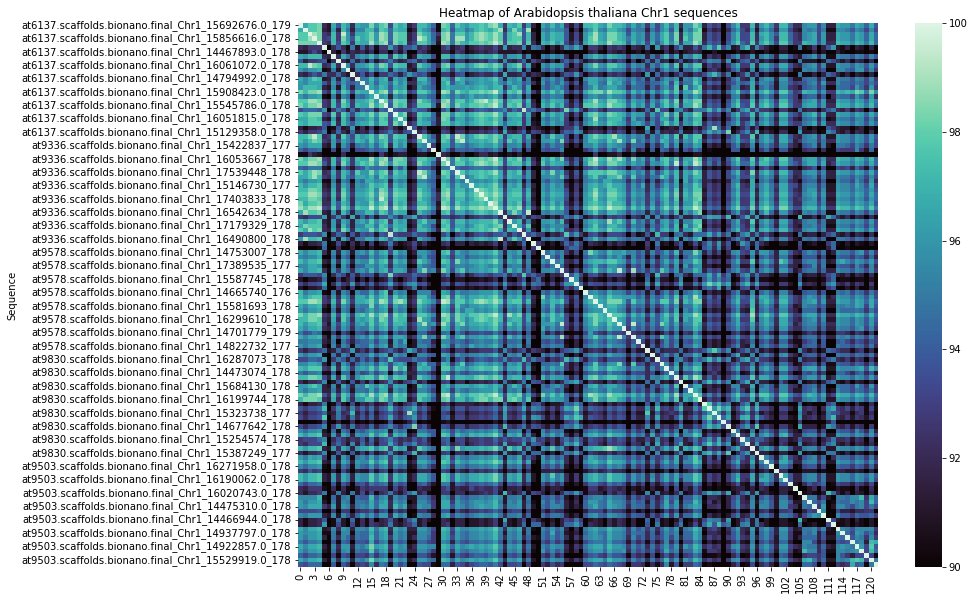

In [76]:
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(df2, cmap = "mako", vmin=90, vmax=100).set(title="Heatmap of Arabidopsis thaliana Chr1 sequences")
fig.savefig('cen1_heatmap.png', bbox_inches='tight')
plt.show()